In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [2]:
header = ["id", "age", "gender", "education", "country", "ethnicity", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "semer", "vsa"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=header)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0




Semer est une drogue fictive ajouté dans le questionnaire par les chercheurs.  
Les personnes ayant répondu qu'ils en avaient consommé ont donc menti on a donc décidé de supprimé ces personnes du dataset.

In [3]:
df.loc[df["semer"] != "CL0"].index

Int64Index([727, 817, 1516, 1533, 1698, 1769, 1806, 1823], dtype='int64')

In [4]:
semer_consummer_index = df.loc[df["semer"] != "CL0"].index

print("Nombre de personnes ayant indiqué avoir consommé la drogue fictive : ", semer_consummer_index.size)

df.drop(index = semer_consummer_index, inplace = True)

Nombre de personnes ayant indiqué avoir consommé la drogue fictive :  8


In [5]:
df_cannabis = df.loc[:,["age", "gender", "education", "country", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "cannabis"]]
# On ne garde pas ethnicity
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL3
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL6


#### On change le type de la colonne cannabis  
-1 signifie que la personne n'est pas consommatrice, 1 signifie qu'elle l'est.
Les valeurs CLx indique quand a été la dernière prise de cette drogue par la personne.
Nous avons choisi de fixer le seuil à partir duquel on considère que la personne n'est plus consommatrice à 1 an.
Si elle n'a pas consommé depuis 1 an alors cette personne n'est pas consommatrice.

In [6]:
def CL_to_binary_class(cl):
    if(cl=="CL0" or cl=="CL1" or cl=="CL2"):
        return -1
    else:
        return 1

df_cannabis["cannabis"] = df_cannabis["cannabis"].apply(CL_to_binary_class)
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


#### On renomme les valeurs des colonnes *age*, *gender*, *education* et *country* pour rendre plus lisible les noms des colonnes après avoir appliqué le one-hot

In [7]:
age = {-0.95197:"18-24", -0.07854:"25-34", 0.49788:"35-44", 1.09449:"45-54", 1.82213:"55-64", 2.59171:"65+"}
gender = {-0.48246:"male", 0.48246:"female"}
education = {-2.43591:"left school before 16", -1.7379:"left school at 16", -1.43719:"left school at 17", -1.22751:"left school at 18", -0.61113:"left college without degree", -0.05921:"professionnal certificate", 0.45468:"university degree", 1.16365:"master degree", 1.98437:"doctorate degree"}
country = {-0.57009:"USA", -0.46841:"New Zealand", -0.28519:"Other", -0.09765:"Australia", 0.21128:"Republic of Ireland", 0.24923:"Canada", 0.96082:"UK"}

def rename_age(x):
    return age[x]

def rename_gender(x):
    return gender[x]

def rename_education(x):
    return education[x]

def rename_country(x):
    return country[x]

df_cannabis["age"] = df_cannabis["age"].apply(rename_age)
df_cannabis["gender"] = df_cannabis["gender"].apply(rename_gender)
df_cannabis["education"] = df_cannabis["education"].apply(rename_education)
df_cannabis["country"] = df_cannabis["country"].apply(rename_country)

del age
del gender
del education
del country

df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [8]:
# Cette cellule de code ne sert en vraie à rien à part voir la quantité de personnes dans chaque pays

country = df_cannabis["country"] # on extrait la colonne country
country = np.array(country).reshape(-1, 1) # on reshape sous un format que l'on peut utiliser
enc = OneHotEncoder(handle_unknown='ignore') # on creer le one hot encoder
enc.fit(country) # on fit sur nos données
df_cannabis_encoded = pd.DataFrame(enc.transform(country).toarray(), columns=enc.get_feature_names_out())
df_cannabis_encoded.sum()
# On voit que les deux pays majoritaire sont le Royaume-Unis et les USA


x0_Australia                52.0
x0_Canada                   87.0
x0_New Zealand               5.0
x0_Other                   118.0
x0_Republic of Ireland      20.0
x0_UK                     1044.0
x0_USA                     551.0
dtype: float64

#### On fait le one-hot sur les colonnes *age*, *gender*, *education* et *country* et on combine les nouvelles colonnes avec les autres features

In [9]:
# perform one-hot encoding on categorical features
categorical_features = ['age', 'gender', 'education', 'country']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cannabis[categorical_features])
df_cannabis_encoded = pd.DataFrame(enc.transform(df_cannabis[categorical_features]).toarray(), columns=enc.get_feature_names_out())
# on modifie les index car on avait supprimé certaine lignes donc ce ne sont pas exactement les memes sinon
df_cannabis_encoded.index = df_cannabis.index
# combine the one-hot encoded features with the numerical features
X = pd.concat([df_cannabis.drop(categorical_features, axis=1), df_cannabis_encoded ], axis=1).drop("cannabis", axis=1)
y = df_cannabis['cannabis']

In [10]:
X

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,age_18-24,age_25-34,age_35-44,...,education_master degree,education_professionnal certificate,education_university degree,country_Australia,country_Canada,country_New Zealand,country_Other,country_Republic of Ireland,country_UK,country_USA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1881,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1882,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1883,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
y

0      -1
1       1
2       1
3      -1
4       1
       ..
1880    1
1881    1
1882    1
1883    1
1884    1
Name: cannabis, Length: 1877, dtype: int64

#### Séparation des données en train, valid et test

In [12]:

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

### Petit test avec arbre de décision

0.8671964679911699


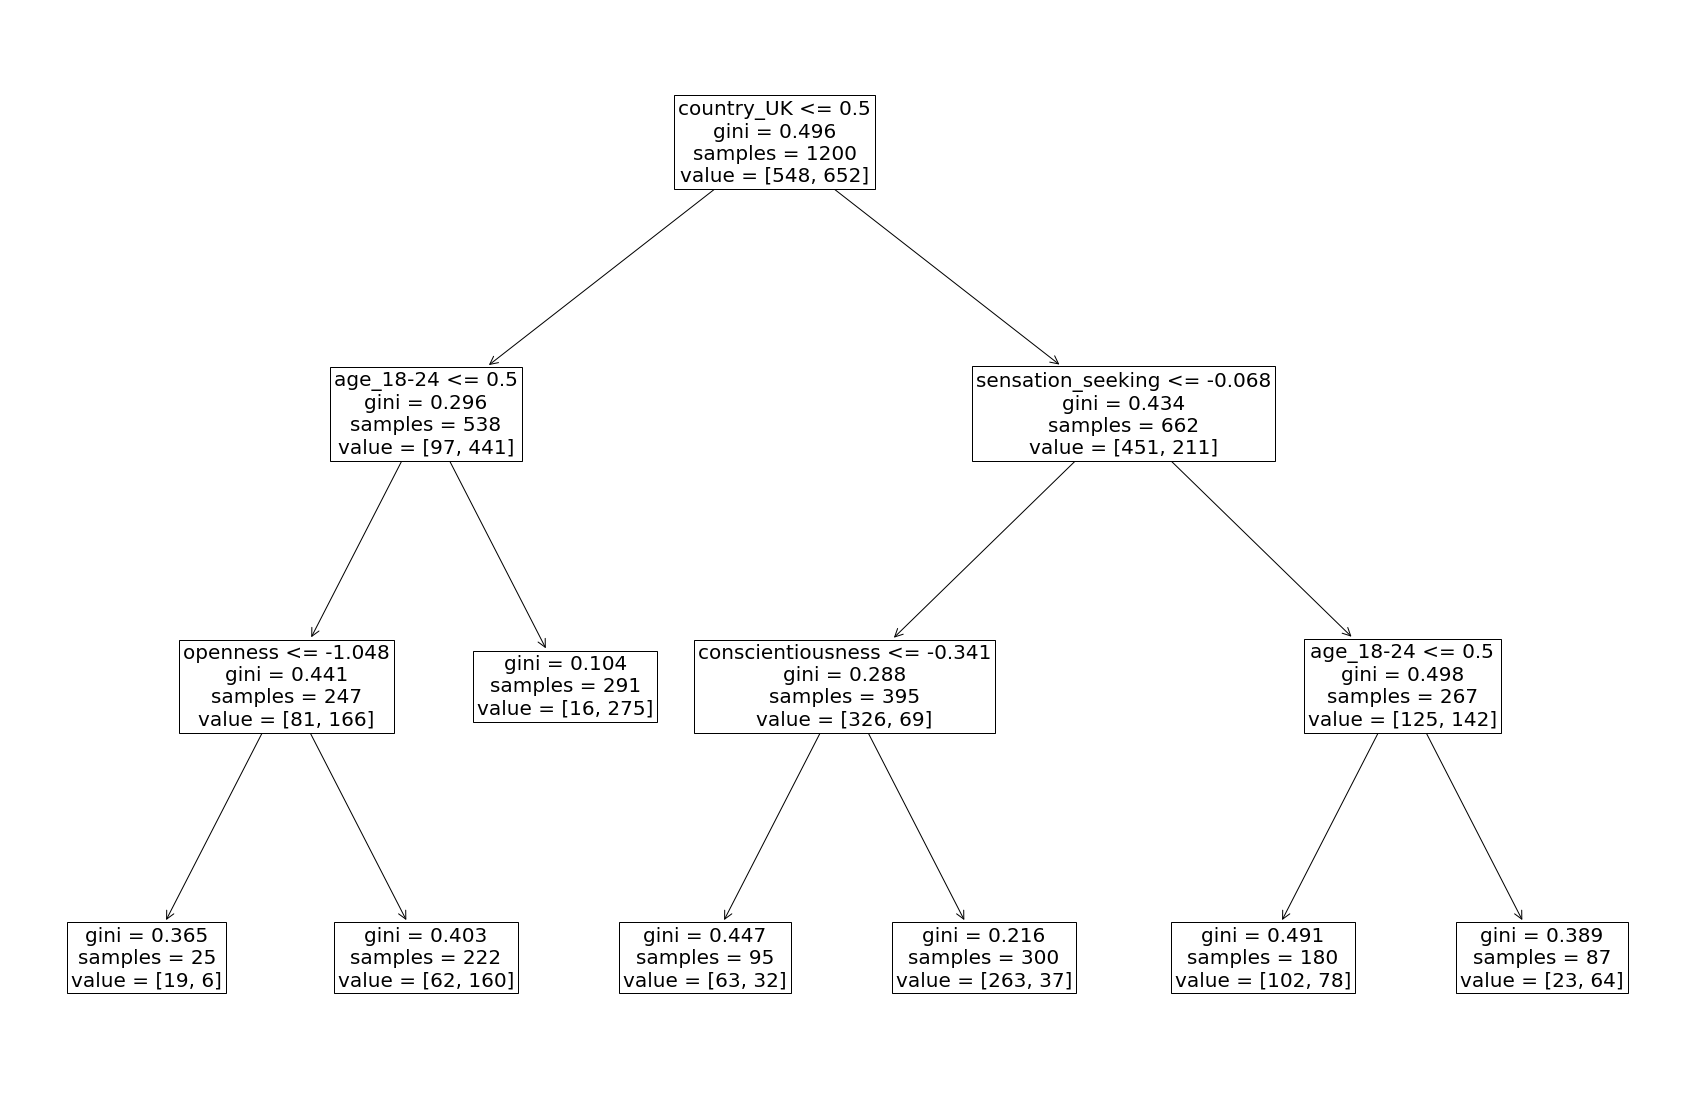

In [14]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_valid)
print(balanced_accuracy_score(y_valid, y_pred))

In [15]:
score_train = cross_val_score(clf, X_train_valid, y_train_valid, cv=5)
print(score_train.mean(), score_train.std())

0.8021284606866003 0.024755212189674955


# Test de plusieurs hyper-paramètres des arbres de décisions

### Nombre de feuilles

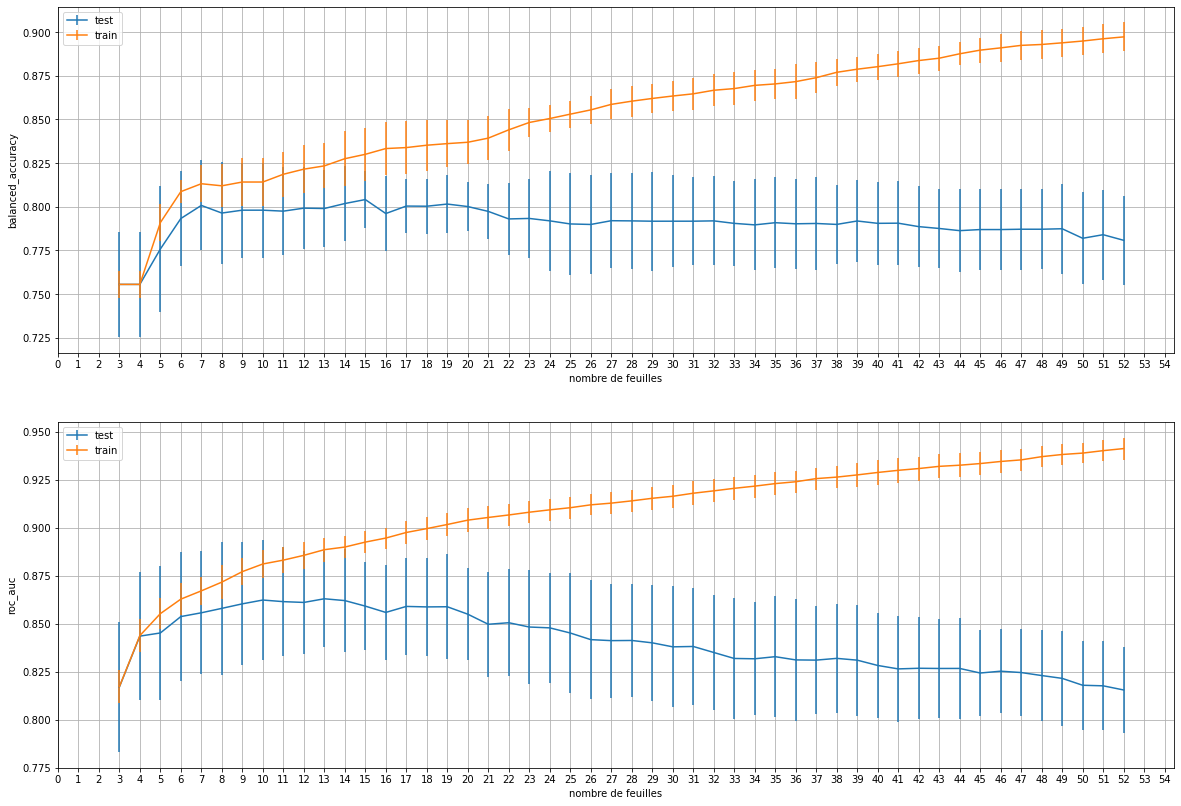

In [16]:
# Teste de l'hyperparamètre : nombre de feuille

nom_param = "nombre de feuilles"
limite_param = 50
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(max_leaf_nodes=n+3, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5))

### Profondeur maximale

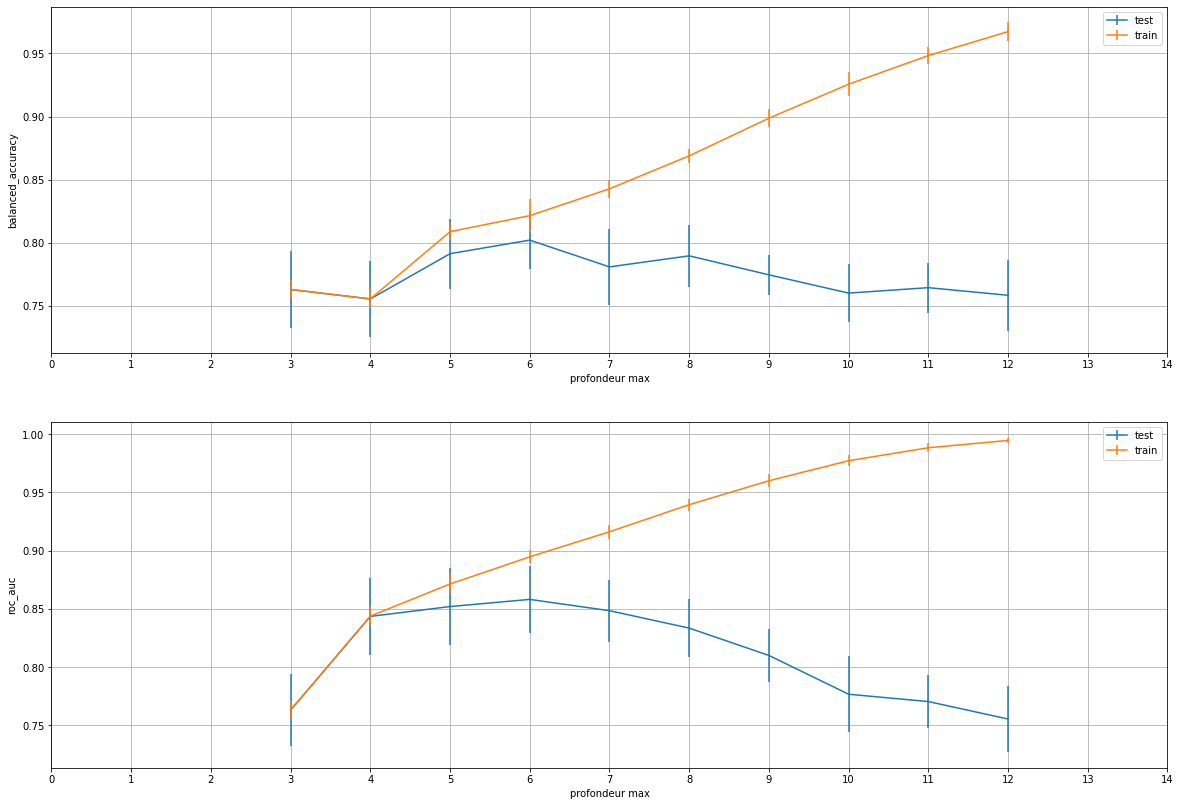

In [17]:
# Teste de l'hyperparamètre : profondeur max
nom_param = "profondeur max"
limite_param = 10
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(max_depth=n+1, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5))

### Nombre de sample minimum nécessaire pour effectuer un nouveau branchement

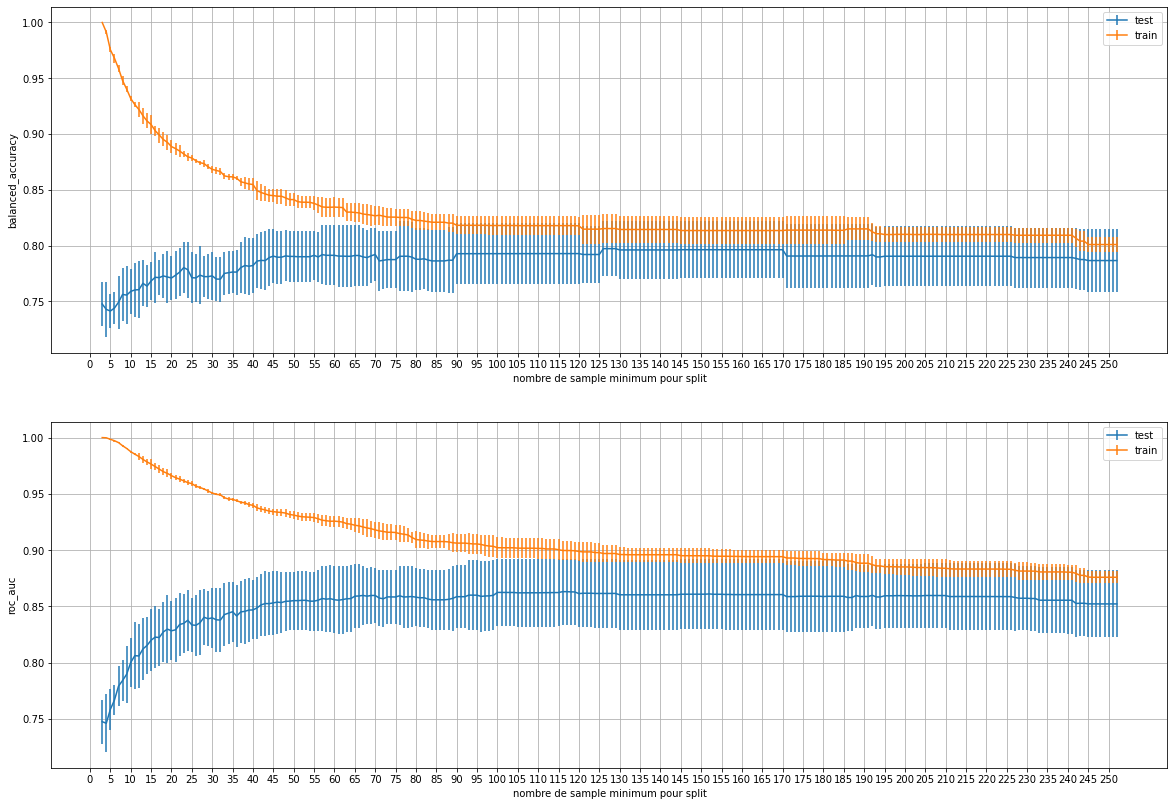

In [18]:
# Teste de l'hyperparamètre : nombre de sample min pour split
nom_param = "nombre de sample minimum pour split"
limite_param = 250
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(min_samples_split=n+2, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5, 5))

### Nombre de sample minimum par feuille

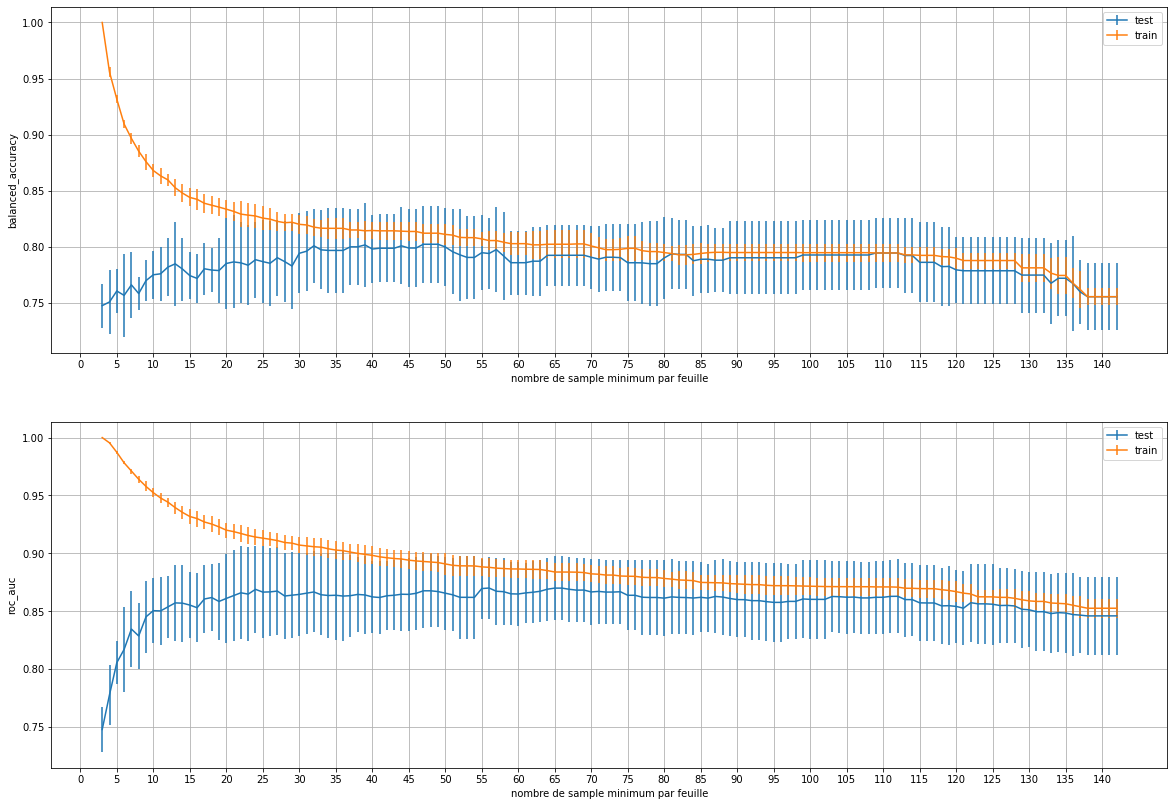

In [19]:
# Teste de l'hyperparamètre : nombre de sample min par feuille
nom_param = "nombre de sample minimum par feuille"
limite_param = 140
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(min_samples_leaf=n+1, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5, 5))

## Prediction avec des arbres qui ont différents paramètres sur X_test

In [20]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)
clf.fit(X_train_valid, y_train_valid)
# fig, ax = plt.subplots(figsize=(30, 20))
# tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7659574468085106


In [21]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
# fig, ax = plt.subplots(figsize=(30, 20))
# tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7686170212765957


In [22]:
clf = DecisionTreeClassifier(min_samples_split=95, random_state=0)
clf.fit(X_train, y_train)
# fig, ax = plt.subplots(figsize=(30, 20))
# tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7606382978723405


In [23]:
clf = DecisionTreeClassifier(min_samples_leaf=32, random_state=0)
clf.fit(X_train, y_train)
# fig, ax = plt.subplots(figsize=(30, 20))
# tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7606382978723404


## Test de polynomial features et PCA avec regression linéaire

In [24]:

poly = PolynomialFeatures(2)
pca = PCA(0.9)

#pipeline = make_pipeline(poly, pca, LogisticRegression())


# train the logistic regression model with cross-validation
#scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
clf = LogisticRegression()

# fit the model on the entire training set
#X_train = pd.DataFrame(poly.fit_transform(X_train))
#pca.fit(X_train)
#X_train = pca.transform(X_train)

clf.fit(X_train, y_train)


# make predictions on the testing set
#X_test = pd.DataFrame(poly.fit_transform(X_test))
#X_test = pca.transform(X_test)
y_pred = clf.predict(X_test)

# evaluate the model's accuracy, balanced accuracy, and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {balanced_accuracy:.2f}")
print(f"ROC AUC score: {roc_auc:.2f}")
print(f"Cross-validation scores: {scores}")
print(f"Cross-validation scores Moyenne {np.mean(scores):.2f}")

# print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix:\n{conf_matrix}\n\nClassification report:\n{class_report}")

Accuracy: 0.80
Balanced accuracy: 0.80
ROC AUC score: 0.80
Cross-validation scores: [0.81666667 0.78333333 0.77916667 0.8125     0.83333333]
Cross-validation scores Moyenne 0.81
Confusion matrix:
[[157  31]
 [ 43 145]]

Classification report:
              precision    recall  f1-score   support

          -1       0.79      0.84      0.81       188
           1       0.82      0.77      0.80       188

    accuracy                           0.80       376
   macro avg       0.80      0.80      0.80       376
weighted avg       0.80      0.80      0.80       376



In [25]:
clf.coef_

array([[-0.12085238, -0.14586932,  0.67203816,  0.07223228, -0.43800177,
        -0.08326595,  0.56139555,  1.34004771,  0.43977687, -0.02970577,
        -0.27813023, -0.46423927, -1.00641842, -0.33778988,  0.33912077,
        -0.507723  ,  0.06341989,  0.5421846 ,  0.71897   , -0.14418234,
         0.42281367, -0.58581893,  0.02854527, -0.53687826,  0.82117911,
        -0.07813286,  0.22260607, -0.68096311,  0.31526947, -1.17300253,
         0.57437474]])

In [27]:
X.columns

Index(['neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsiveness', 'sensation_seeking', 'age_18-24',
       'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65+',
       'gender_female', 'gender_male', 'education_doctorate degree',
       'education_left college without degree', 'education_left school at 16',
       'education_left school at 17', 'education_left school at 18',
       'education_left school before 16', 'education_master degree',
       'education_professionnal certificate', 'education_university degree',
       'country_Australia', 'country_Canada', 'country_New Zealand',
       'country_Other', 'country_Republic of Ireland', 'country_UK',
       'country_USA'],
      dtype='object')